In [1]:
#Load in mnist dataset or download if not available
from pathlib import Path
import requests
import pickle
import gzip
import matplotlib.pyplot as plt
import numpy as np 
import torch
import math

DATA_PATH=Path("data")
PATH=DATA_PATH/"mnist"
PATH.mkdir(parents=True,exist_ok=True)
URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

with gzip.open((PATH/FILENAME).as_posix(),'rb') as f:
    ((x_train,y_train),(x_valid,y_valid),_)=pickle.load(f,encoding="latin-1")
   


(50000, 784)


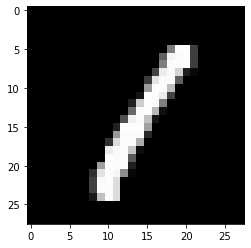

In [2]:

#Show a value to confirm it worked
plt.imshow(x_train[3].reshape((28,28)),cmap="gray")
print(x_train.shape)

In [3]:
#Apply tensor function to training and validation data
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

In [4]:
#Validate what's in the training set
batches,dimensions=x_train.shape
print(f"Training set contains {batches} batches and {dimensions} dimensions each")

Training set contains 50000 batches and 784 dimensions each


In [5]:


def log_softmax(x): #Activation function
    return x-x.exp().sum(-1).log().unsqueeze(-1)
def model(xb): #Simple single layer model with logsoftmax activation
    return log_softmax(xb @ weights + bias)  #Takes batch * weights and runs it through act function
def nll(inp,target):
    return -inp[range(target.shape[0]),target].mean() #Overall loss
def accuracy(out,yb): #Accuracy
    preds=torch.argmax(out,dim=1)
    return (preds==yb).float().mean()

def get_batch(bs,x,y): #Function to pass the next batch, based on x_train, y_train
    nbatches=x_train.shape[0]//bs
    current_batch=0
    while current_batch<nbatches:
        yield x[current_batch*bs:(current_batch+1)*bs], y[current_batch*bs:(current_batch+1)*bs]
        current_batch+=1

In [6]:
#Initialize weights and biases and losses/accuracy arrays
weights=torch.randn(784,10)/math.sqrt(784) 
weights.requires_grad_()
bias=torch.zeros(10,requires_grad=True)
loss_func=nll
losses=[]
acc=[]


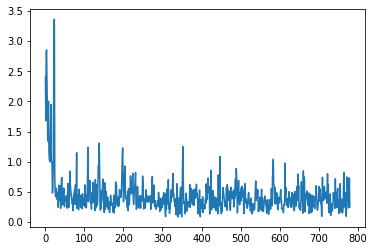

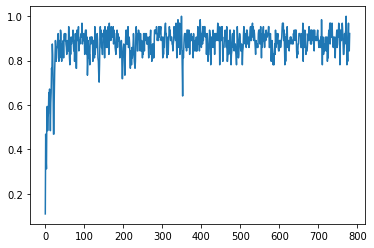

In [7]:
#Create batch generator based on batch size and then pass into model until exhausted
batch_size=64
max_batches=x_train.shape[0]//batch_size
batches=get_batch(batch_size,x_train,y_train)
for i in range(max_batches):
    xb,yb=next(batches)
    preds=model(xb)
    loss=loss_func(preds,yb)
    loss.backward()
    with torch.no_grad():
      weights-=weights.grad
      weights.grad.zero_()
    losses.append(loss)
    accu=accuracy(preds,yb)
    acc.append(accu)
    #print(loss)
    #print(accu)
plt.plot(losses)
plt.show()
plt.plot(acc)


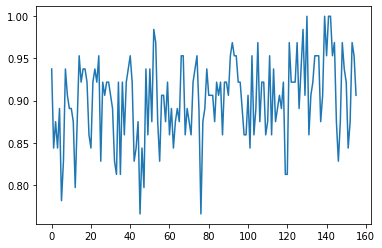

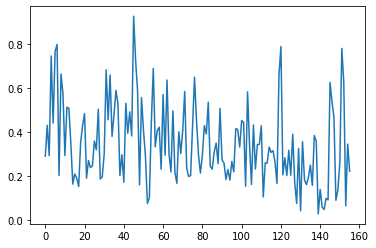

In [8]:
#See how we did by feeding against validation dataset
v_accu=[]
v_losses=[]

batch_size=64
max_batches=x_valid.shape[0]//batch_size
batches_v=get_batch(batch_size,x_valid,y_valid)

for i in range(max_batches):
    xv_b,yv_b=next(batches_v)
    preds=model(xv_b)
    vacc=accuracy(preds,yv_b)
    loss=loss_func(preds,yv_b)
    v_accu.append(vacc)
    v_losses.append(loss)
plt.plot(v_accu)
plt.show()
plt.plot(v_losses)



In [24]:
import pdb

In [30]:
#Using NN Module
from torch.nn import functional as F
loss_func=F.cross_entropy
def model_2(xb):
    return xb @ weights + bias
#Can see that both return the same value
print(loss_func(model_2(xv_b),yv_b),accuracy(model_2(xb),yb))
print(loss_func(model(xv_b),yv_b),accuracy(model(xb),yb))

tensor(0.2208, grad_fn=<NllLossBackward>) tensor(0.9844)
tensor(0.2208, grad_fn=<NllLossBackward>) tensor(0.9844)


In [33]:
test=nn.Linear(784,10)

In [52]:
accuracy(model_2(xb),yb)

tensor(0.9844)

In [53]:
accuracy(model(xb),yb)

tensor(0.9844)

In [31]:
loss_func

<function torch.nn.functional.cross_entropy(input, target, weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')>

In [28]:
pdb.set_trace()
model_2(xv_b)

--Return--
None
> <ipython-input-28-cf38d12794d4>(1)<module>()
----> 1 pdb.set_trace()
      2 model_2(xv_b)

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

> /Users/mmac/Documents/Programming/Pytorch Practice/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py(3329)run_ast_nodes()
   3327                     to_run.append((node, 'single'))
   3328 
-> 3329                 for node,mode in to_run:
   3330                     if mode == 'exec':
   3331                         mod = Module([node], [])

> /Users/mmac/Documents/Programming/Pytorch Practice/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py(3330)run_ast_nodes()
   3328 
   3329                 for node,mode in to_run:
-> 3330                     if mode == 'exec':
   3331                         mod = Module([node], [])
   3332                     elif mode == 'single':

> /Users/mmac/Documents/Programming/P

BdbQuit: 

In [19]:
from torch import nn 
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter
        

In [22]:
bias.grad

tensor([ 0.9381, -0.6174, -0.4201,  0.4870, -0.1892, -3.4654,  0.2760, -1.2454,
         3.6399,  0.5966])